In [1]:
import os

In [2]:
os.environ['AOC_SESSION'] = '53616c7465645f5f2390b1a2a8981260b4addfea3af95b32f034711559bdec07664fba46dcaafbd454968913573814f5'

In [4]:
os.chdir("..")
os.path.abspath(".")

'/home/rayb/projects/adventofcode/2019'

In [5]:
from aocd import get_data
from collections import defaultdict
import random

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [9, 6]

In [6]:
from intcode import Intcode

In [7]:
data = get_data(year=2019, day=15)

In [8]:
NORTH = 1
SOUTH = 2
WEST = 3 
EAST= 4

WALL = 0
OK = 1
STOP = 2

In [9]:
def get_next_position(direction, x, y):
    if direction == NORTH:
        return x, y+1
    elif direction == SOUTH:
        return x, y-1
    elif direction == WEST:
        return x-1, y
    elif direction == EAST:
        return x+1, y

In [10]:
def turn(direction):
    if direction == NORTH:
        return EAST
    elif direction == SOUTH:
        return WEST
    elif direction == EAST:
        return SOUTH
    elif direction == WEST:
        return NORTH

In [11]:
def turn_random(direction):
    while True:
        d = random.choice(range(1, 5))
        if d != direction:
            return d

In [75]:
def run(data, limit=float('inf'), debug=False, print_steps=10):
    counter = 0
    positions = defaultdict(int)
    x, y = 0, 0
    # starting condition
    positions[(x, y)] = '-'
    direction = EAST
    turns = 0
    ic = Intcode(data, input_queue=[])
    path = [(x, y)]
    while counter < limit:
        ic.input_queue.append(direction)
        ic.run()
        result = ic.output_queue.pop()
        if result == OK:
            x, y = get_next_position(direction, x, y)
            positions[(x,y)] = "-"
            path.append((x,y))
        elif result == WALL:
            positions[get_next_position(direction, x, y)] = "#"
            # check to right
            right = turn(direction)
            ic.input_queue.append(right)
            ic.run()
            check_right = ic.output_queue.pop()
            if check_right == OK:
                direction = right
                x, y = get_next_position(direction, x, y)
                positions[(x,y)] = "-"
                path.append((x,y))
            elif check_right == WALL:
                positions[get_next_position(right, x, y)] = "#"
                left = turn(turn(turn(direction)))
                ic.input_queue.append(left)
                ic.run()
                check_left = ic.output_queue.pop()
                if check_left == OK:
                    direction = left
                    x, y = get_next_position(direction, x, y)
                    positions[(x,y)] = "-"
                    path.append((x,y))
            else: # go back a space and try to turn
                direction = turn(turn(direction))
                ic.input_queue.append(direction)
                ic.run()
                # already know this is ok
                ic.output_queue.pop()
                # check to right
                right = turn(direction)
                ic.input_queue.append(right)
                ic.run()
                check_right = ic.output_queue.pop()
                if check_right == OK:
                    direction = right
                    x, y = get_next_position(direction, x, y)
                    positions[(x,y)] = "-"
                    path.append((x,y))
                elif check_right == WALL:
                    positions[get_next_position(direction, x, y)] = "#"
                    left = turn(turn(turn(direction)))
                    ic.input_queue.append(left)
                    ic.run()
                    check_left = ic.output_queue.pop()
                    if check_left == OK:
                        direction = left
                        x, y = get_next_position(direction, x, y)
                        positions[(x,y)] = "-"
                        path.append((x,y))
        elif result == STOP:
            positions[(x,y)] = "-"
            x, y = get_next_position(direction, x, y)
            path.append((x,y))
            positions[(x,y)] = "$"
            print("$$$$")
            return positions
        counter += 1
    return positions, path, ic

In [76]:
def display(positions):
    ok_x, ok_y = zip(*[k for k, v in positions.items() if v == "-"])
    wall_x, wall_y = zip(*[k for k, v in positions.items() if v == "#"])
    plt.scatter(ok_x, ok_y, c='red', marker=".")
    plt.scatter(wall_x, wall_y, c='black', marker="s")

In [78]:
positions, path, ic  = run(data, 5000)

In [79]:
{k: v for k, v in positions.items() if v == "$"}

{}

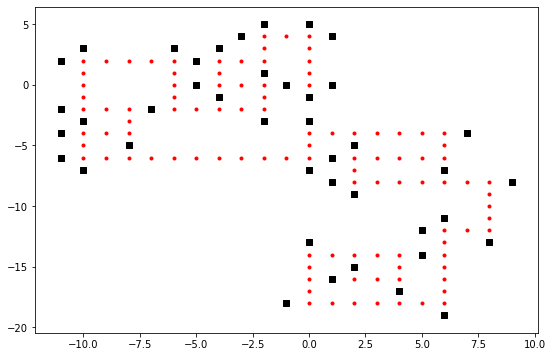

In [80]:
display(positions)

In [81]:
path[90:]

[(0, -18),
 (0, -17),
 (0, -16),
 (0, -15),
 (0, -14),
 (1, -14),
 (2, -14),
 (3, -14),
 (4, -14),
 (4, -15),
 (4, -16),
 (3, -16),
 (2, -16)]